<a href="https://www.kaggle.com/code/juliovalderrama/latitude-gdp-education-a-relationship-analysis?scriptVersionId=202635255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing the Influence of Distance from Equator on Average GDP and Education Enrollment

## Introduction

In this notebook, we investigate the relationship between the **Distance from the Equator** and two dependent variables:
- **Average GDP** (a measure of economic performance).
- **Gross Tertiary Education Enrollment** (a measure of educational achievement).

We will use **Multiple Linear Regression** to explore how the independent variable (Distance from Equator) influences both GDP and education enrollment.

Additionally, we will utilize various visualization tools to better understand these relationships, including:
- **3D Scatter Plot**: To visualize the interaction between GDP, education enrollment, and distance from the equator in three dimensions.
- **Box Plot**: To identify the distribution and outliers in GDP and education enrollment data.
- **Correlation Heatmap**: To examine the relationships between all the variables involved.
- **Scatter Plots**: To visually assess the relationships between individual pairs of variables.

These visual tools will provide deeper insights and help us better understand the patterns and relationships in the data.


## Data Sources

For this analysis, we utilized four datasets from reputable sources to explore the relationship between geographic latitude, GDP per capita, and tertiary education enrollment. Below are the details of the data sources:

1. **GDP per Capita (2014-2023)**: 
   - This dataset provides the GDP per capita for various countries over a span of 10 years. It was retrieved from the **World Bank's open data platform**.
   - **Source**: [World Bank - GDP per Capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

2. **Countries Position (Latitude and Longitude)**: 
   - This dataset contains geographical information, including latitude and longitude, for each country. It helps in determining the distance of each country from the equator.
   - **Source**: [GeoCountries - Country Geolocation](http://www.geocountries.com/country/geolocation)

3. **Population Data**: 
   - This dataset provides population estimates for various countries and is useful for additional analysis or normalization purposes.
   - **Source**: [World Population Review](https://worldpopulationreview.com/)

4. **Global Education (Tertiary Education Enrollment)**: 
   - This dataset includes global education statistics, focusing on tertiary education enrollment rates across countries. It was sourced from the **World Bank's Education Statistics database**.
   - **Source**: [World Bank - Education Statistics](http://data.worldbank.org/data-catalog/ed-stats)

These datasets collectively provide a comprehensive view of how geographic location influences economic and educational outcomes globally. Each source has been selected for its credibility and reliability in providing high-quality data.

## Step 1. Importing Libraries and Loading the Data

We begin by importing the necessary libraries and loading the datasets.

In [1]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the datasets
countries_position_df = pd.read_csv('/kaggle/input/gdp-per-capita-vs-latitude-per-country/Countries Position.csv')
gdp_per_capita_df = pd.read_csv('/kaggle/input/gdp-per-capita-vs-latitude-per-country/GDP per Capita.csv')
education_df = pd.read_csv('/kaggle/input/education-and-population-per-country/Global Education.csv')
population_df = pd.read_csv('/kaggle/input/education-and-population-per-country/Population per Country.csv')

gdp_per_capita_df.describe()

,Country Name,Country Code,Series Name,Series Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,268,266,266,266,266,266,266,266,266,266,266,266,266,266
unique,268,266,1,1,255,257,254,254,254,254,254,253,248,233
top,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,..,..,..,..,..,..,..,..,..,..
freq,1,1,266,266,10,8,11,11,11,11,11,12,17,32


In [2]:
# Merge the countries position data with the GDP per capita data
merged_df = pd.merge(countries_position_df, gdp_per_capita_df, how='inner', left_on='ISO-3166 alpha3', right_on='Country Code')

# Display the first few rows of the merged data
merged_df.head()

,Country,ISO-3166 alpha2,ISO-3166 alpha3,Capital,Latitude,Longitude,Country Name,Country Code,Series Name,Series Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Andorra,AD,AND,Andorra la Vella,42.5078,1.5211,Andorra,AND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,38402.64926,38885.53032,39886.64008,39321.61431,39320.09245,39413.79088,34394.41404,36616.10076,39720.95186,40161.76953
1,United Arab Emirates,AE,ARE,Abu Dhabi,24.4539,54.3773,United Arab Emirates,ARE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,39242.27531,41525.1389,43457.51348,43419.56374,43644.14705,43785.41727,41276.05551,42715.44017,45698.01053,46877.42869
2,Afghanistan,AF,AFG,Kabul,34.5553,69.2075,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,576.4878173,566.8811297,564.9208406,563.4882365,553.973306,559.140954,529.1449097,407.6165052,372.6158948,..
3,Antigua and Barbuda,AG,ATG,Saint John's,17.1274,-61.8468,Antigua and Barbuda,ATG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,15882.30926,15985.54114,16526.43614,16830.39626,17901.04091,18357.67882,14803.76951,15921.09512,17335.04704,17902.37992
4,Albania,AL,ALB,Tirana,41.3275,19.8189,Albania,ALB,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,3855.760744,3952.803574,4090.372728,4249.820049,4431.555595,4543.38771,4418.660874,4857.111942,5155.29086,5394.18241


### Next Steps:
After loading the data, we will proceed with cleaning and merging the datasets to prepare for analysis.

## Step 2: Selecting Relevant Columns for GDP Data (2014-2023)
This process extracts GDP per capita data for the years 2014 to 2023, converts it into numeric form, and calculates the average GDP per capita over the 10-year period for each country. The cleaned and averaged data is stored in the `Average` column of the DataFrame.

To understand the relationship between a country’s location and its economic performance, we calculate the distance from the equator using the absolute value of the latitude. The closer a latitude is to zero, the closer the country is to the equator.

Finally, we select the key columns needed for our analysis: the Country Name, Country Code, Distance from the Equator, and the Average GDP per Capita.

In [3]:
# Select relevant columns for the last 10 years (2014 to 2023)
gdp_columns = [f'{year} [YR{year}]' for year in range(2014, 2024)]

# Apply numeric conversion to ensure data is in numerical format
gdp_columns_cleaned = merged_df[gdp_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average GDP per capita for the available years
merged_df['Average GDP'] = gdp_columns_cleaned.mean(axis=1)

# Calculate the absolute latitude (distance from the equator)
merged_df['Distance from Equator'] = merged_df['Latitude'].abs()

# Select relevant columns for analysis
gdp_equator_df = merged_df[['Country Name', 'Country Code', 'Distance from Equator', 'Average GDP']]

gdp_equator_df.head(), gdp_equator_df.describe()

(           Country Name Country Code  Distance from Equator   Average GDP
 0               Andorra          AND                42.5078  38612.355349
 1  United Arab Emirates          ARE                24.4539  43164.099065
 2           Afghanistan          AFG                34.5553    521.585510
 3   Antigua and Barbuda          ATG                17.1274  16744.569412
 4               Albania          ALB                41.3275   4494.894649,
        Distance from Equator    Average GDP
 count             217.000000     211.000000
 mean               25.593378   17313.012580
 std                16.824570   25808.274578
 min                 0.180700     275.440645
 25%                12.134800    2318.938576
 50%                21.461200    6455.349597
 75%                39.933400   20501.068476
 max                64.183500  183136.559744)

In [4]:
# We create a new Data Frame out of Population with only the columns we need in order to merge it after
population_df = population_df[['cca3', 'pop2023']]

# We merge population df with GDP and the Distance with the Equator
gdp_equator_df = pd.merge(gdp_equator_df, population_df, how='inner', left_on='Country Code', right_on='cca3')

# We check what are the NaN values for Average, only 6
missing_values = gdp_equator_df[gdp_equator_df['Average GDP'].isna()]
missing_values

# We drop the NaN values as we are missing GDP
gdp_equator_df.dropna(inplace=True)

### Step 4: Harmonizing Country Names and Renaming Columns

In this step, we perform the following:

1. **Subset Education Data**: We select only the relevant columns, `Countries and areas` and `Gross_Tertiary_Education_Enrollment`, from `education_df`.

2. **Harmonize Country Names**: We map mismatched country names in `education_df` to align them with the names in other datasets using a dictionary `country_name_mapping`.

3. **Rename Column**: We rename `Gross_Tertiary_Education_Enrollment` to `Tertiary Education` for simplicity and clarity.

This ensures that the country names are consistent across datasets and that column names are clear and concise.

In [5]:
education_df = education_df[['Countries and areas', 'Gross_Tertiary_Education_Enrollment']]

# Map mismatched country names to harmonize datasets
country_name_mapping = {
    'The Gambia': 'Gambia, The',
    'Ivory Coast': "Cote d'Ivoire",
    'The Netherlands': 'Netherlands',
    'Turkey': 'Türkiye',
    'Russia': 'Russian Federation',
    'South Korea': 'Korea, Rep.',
    'North Korea': 'Korea, Dem. People’s Rep.',
    'St Kitts and Nevis': 'St. Kitts and Nevis',
    'St Vincent and Grenadines': 'St. Vincent and the Grenadines',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Sint Maarten': 'Sint Maarten (Dutch part)',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'Taiwan': 'Taiwan, China',
    'Syria': 'Syrian Arab Republic',
    'Vietnam': 'Viet Nam',
    'Yemen': 'Yemen, Rep.',
    'Guinea0Bissau': 'Guinea-Bissau ',
    'Palestinian National Authority': 'Palestine',
    'The Bahamas': 'Bahamas',
    'Republic of the Congo': 'Congo Republic',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines'
}

# Apply the mapping to countries position data
education_df['Countries and areas'] = education_df['Countries and areas'].replace(country_name_mapping)

education_df.rename(columns={'Gross_Tertiary_Education_Enrollment': 'Tertiary Education'}, inplace=True)

education_df.head()

,Countries and areas,Tertiary Education
0,Afghanistan,9.7
1,Albania,55.0
2,Algeria,51.4
3,Andorra,0.0
4,Angola,9.3


### Step 5: Merging GDP, Distance from Equator, and Education Data

In this step, we merge the `gdp_equator_df` (which contains GDP and distance from the equator) with `education_df` (containing tertiary education enrollment data) based on matching **country names**. We perform an **inner join** to keep only the countries present in both datasets.

This merged DataFrame, `gdp_equator_education_df`, now contains the **average GDP**, **distance from the equator**, and **tertiary education enrollment** for each coundata.

In [6]:
gdp_equator_education_df = pd.merge(gdp_equator_df, education_df, how='inner', left_on='Country Name', right_on='Countries and areas')
gdp_equator_education_df.describe()

,Distance from Equator,Average GDP,pop2023,Tertiary Education
count,175.000000,175.000000,1.750000e+02,175.000000
mean,25.805496,15291.961861,4.402142e+07,36.671429
std,16.892011,25089.703343,1.574748e+08,30.275856
min,0.180700,275.440645,1.139600e+04,0.000000
25%,11.935750,2099.519845,2.383442e+06,9.850000
50%,23.588000,6088.178482,1.015624e+07,28.500000
75%,40.294250,16777.832154,3.421526e+07,62.500000
max,64.146600,183136.559744,1.428628e+09,136.600000


### Step 6: Filtering Countries Based on Population

In this step, we filter the merged DataFrame to include only countries with a population greater than **7 million** (`pop2023 > 7,000,000`). This ensures that we focus on countries with a significant population size, making the **GDP** and **education** data more representative of larger economiees.

In [7]:
# We filter the Data Frame in order to get only countries with more than 7 mill of population to be a significant GDP sample
gdp_equator_education_df = gdp_equator_education_df[gdp_equator_education_df['pop2023'] > 7000000]
gdp_equator_education_df = gdp_equator_education_df[['Country Name', 'Country Code', 'Distance from Equator', 'Average GDP', 'Tertiary Education']]
gdp_equator_education_df.describe()

,Distance from Equator,Average GDP,Tertiary Education
count,98.000000,98.000000,98.000000
mean,25.303989,11504.673257,37.610204
std,16.395544,17110.812107,30.985246
min,0.180700,275.440645,0.000000
25%,12.068500,1271.283170,10.125000
50%,23.461950,3711.807473,31.500000
75%,38.415800,10893.581928,62.875000
max,59.329300,86381.667843,136.600000


# Exploratory Data Analysis (EDA)

In this section, we explore the relationships between our key variables using various visualizations and statistical techniques. The goal is to understand how **GDP per capita**, **distance from the equator**, and **tertiary education enrollment** interact. We will employ the following methods:

- **Multiple Linear Regression**: To analyze how both distance from the equator and tertiary education enrollment affect GDP per capita.
- **Regression Plot**: To visualize the relationship between individual variables (such as GDP and distance from the equator).
- **Box Plot**: To observe the distribution of GDP, distance from the equator, and education enrollment, highlighting potential outliers and variations.
- **3D Scatter Plot**: To examine the interaction between the three variables — GDP, distance from the equator, and tertiary education enrollment — in a 3D space.
- **Correlation Heatmap**: To visually display the correlation coefficients between all variables, helping us understand their linear relationships.

These tools will help us uncover trends and patterns in the data that will inform further analysis.

### 1. Performing Multiple Linear Regression

We will now perform two linear regression analyses:
1. **Average GDP** as the dependent variable, influenced by **Distance from Equator**.
2. **Gross Tertiary Education Enrollment** as the dependent variable, influenced by **Distance from Equator**.

The code below fits two regression models.

In [8]:
# Define the independent and dependent variables
X = gdp_equator_education_df['Distance from Equator'] # Double brackets [['...']] are used here because we want X to be a DataFrame.
y_gdp = gdp_equator_education_df['Average GDP'] #Single brackets ['...'] are used here because y_gdp is the dependent variable and we only need a single column as a Series.
y_education = gdp_equator_education_df['Tertiary Education']

# Add a constant to the independent variable for intercept in the regression model
X = sm.add_constant(X)

# Fit the regression models
gdp_model = sm.OLS(y_gdp, X).fit()
education_model = sm.OLS(y_education, X).fit()

# Display the regression results for both models
gdp_model.summary(), education_model.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            Average GDP   R-squared:                       0.341
 Model:                            OLS   Adj. R-squared:                  0.334
 Method:                 Least Squares   F-statistic:                     49.63
 Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.80e-10
 Time:                        10:22:21   Log-Likelihood:                -1073.4
 No. Observations:                  98   AIC:                             2151.
 Df Residuals:                      96   BIC:                             2156.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------

## OLS Regression Results: Analyzing GDP and Tertiary Education Enrollment vs. Distance from the Equator

This output shows the results of two **Ordinary Least Squares (OLS)** regression models, examining how **Distance from the Equator** impacts:
1. **Average GDP per Capita**, and
2. **Tertiary Education Enrollment**.

#### Key Metrics:

- **R-squared**: 
  - **GDP model**: 0.341
  - **Education model**: 0.469
  - This metric indicates how much of the variance in the dependent variable (GDP or education) is explained by the distance from the equator. For example, in the education model, **46.9%** of the variance in tertiary education enrollment is explained by distance from the equator. Higher R-squared values indicate a better fit.

- **Coefficient (coef)**: 
  - **GDP model**: 609.26
  - **Education model**: 1.29
  - The coefficient shows the impact of the independent variable (distance from the equator) on the dependent variable. For every 1-degree increase in latitude (farther from the equator), GDP increases by approximately **609.26 units**, and tertiary education enrollment increases by **1.29 percmodel fits the data well.

#### Summary:
- Distance from the equator significantly impacts both **GDP** and **Tertiary Education Enrollment**.
- The models explain around **34.1%** of the variance in GDP and **46.9%** of the variance in education.
- The positive coefficients indicate that countries farther from the equator tend to have both higher GDP and higher tertiary education enrollment rates.

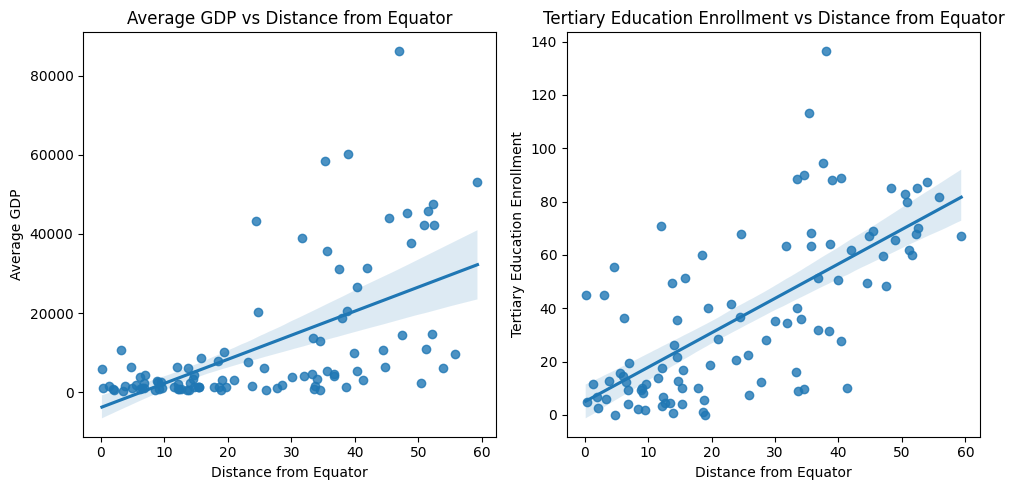

In [9]:
# Regression plot for Average GDP and Tertiary Education Enrollment vs Distance from Equator
plt.figure(figsize=(10, 5))

# Plot for Average GDP
plt.subplot(1, 2, 1)  # Create a 1x2 grid of subplots, and this is the first plot
sns.regplot(x='Distance from Equator', y='Average GDP', data=gdp_equator_education_df)
plt.title('Average GDP vs Distance from Equator')
plt.xlabel('Distance from Equator')
plt.ylabel('Average GDP')

# Plot for Tertiary Education Enrollment
plt.subplot(1, 2, 2)  # This is the second plot in the grid
sns.regplot(x='Distance from Equator', y='Tertiary Education', data=gdp_equator_education_df)
plt.title('Tertiary Education Enrollment vs Distance from Equator')
plt.xlabel('Distance from Equator')
plt.ylabel('Tertiary Education Enrollment')

# Save the graph as image
plt.savefig('Regression Plot.png', dpi=300, bbox_inches='tight')

# Display the plots
plt.tight_layout()  # Adjust spacing between plots
plt.show()

## Box Plot Analysis: GDP and Education Enrollment vs Distance from the Equator Categories

#### 1. Binning the Distance from the Equator:
We divided the **Distance from the Equator** into 5 categories using `pd.cut()` to better visualize the distribution of **GDP** and **Tertiary Education Enrollment** across different geographic locations:
- **Very Low**: Countries closest to the equator.
- **Low, Medium, High, Very High**: Progressively farther from the equator.

#### 2. Box Plot Visualization:
We created two box plots to show the relationship between the distance from the equator and:
- **Average GDP**: Shows how wealth (measured by GDP) is distributed across countries in each distance category.
- **Tertiary Education Enrollment**: Shows the distribution of higher education enrollment rates across the same categories.

#### Insights:
- **GDP vs Distance from the Equator**: The box plot likely reveals a trend where countries farther from the equator (higher distance categories) tend to have higher GDP per capita. The variability in GDP may also increase in higher distance categories, indicating the presence of both wealthy and less wealthy countries in these regions.
  
- **Tertiary Education Enrollment vs Distance**: The second plot might show a positive trend, where countries further from the equator tend to have higher tertiary education enrollment rates, suggesting that geographic location could be associated with access to higher education.

These box plots help visualize potential correlations between geographic location, wealth, and education enrollment, providing a clearer understanding of the impact of distance from the equator on socio-economic factors.

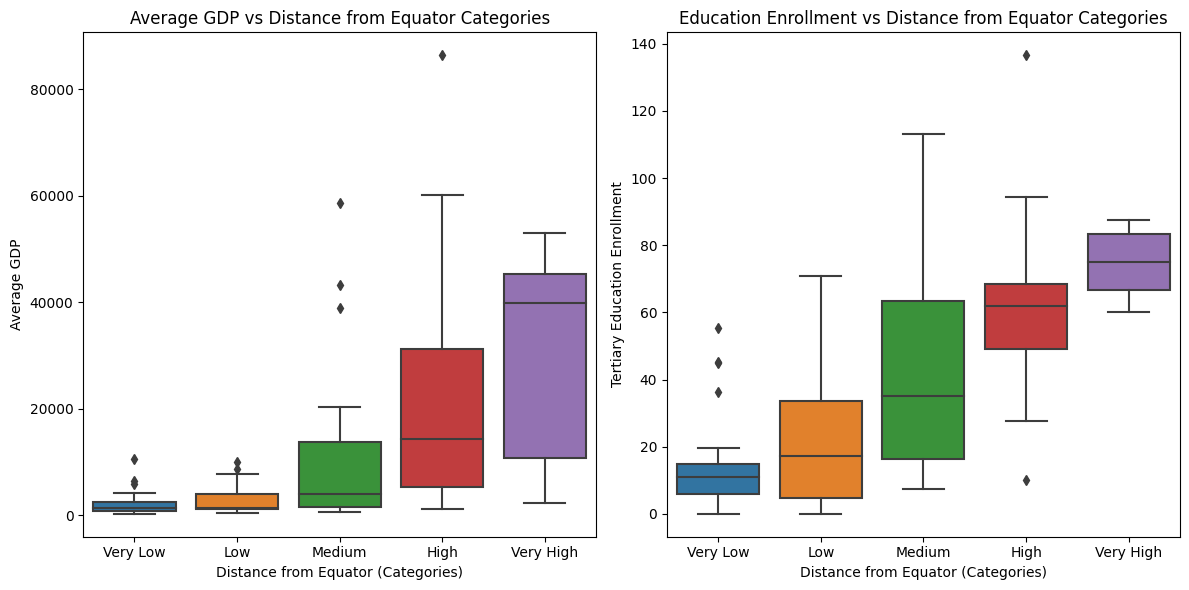

In [10]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Bin the Distance from Equator into categories (for better box plot visualization)
# Create 5 bins for 'Distance from Equator'
gdp_equator_education_df['Distance_Category'] = pd.cut(
    gdp_equator_education_df['Distance from Equator'], 
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Set the plot size
plt.figure(figsize=(12, 6))

# Box plot for Average GDP vs Distance Category
plt.subplot(1, 2, 1)  # Create a 1x2 grid of subplots, and this is the first plot
sns.boxplot(x='Distance_Category', y='Average GDP', data=gdp_equator_education_df)
plt.title('Average GDP vs Distance from Equator Categories')
plt.xlabel('Distance from Equator (Categories)')
plt.ylabel('Average GDP')

# Box plot for Tertiary Education Enrollment vs Distance Category
plt.subplot(1, 2, 2)  # This is the second plot in the grid
sns.boxplot(x='Distance_Category', y='Tertiary Education', data=gdp_equator_education_df)
plt.title('Education Enrollment vs Distance from Equator Categories')
plt.xlabel('Distance from Equator (Categories)')
plt.ylabel('Tertiary Education Enrollment')

# Save the figure before displaying it
plt.savefig('boxplot_gdp_education_vs_distance.png', dpi=300, bbox_inches='tight')

# Display the plots
plt.tight_layout()
plt.show()

## Visualizing the Relationships Between Variables

To better understand the relationships between **Distance from the Equator**, **GDP**, and **Education Enrollment**, we will use the following visualizations:

1. **3D Scatter Plot**: This will help us visualize the interaction between the three variables — allowing us to see how **Distance from the Equator**, **Average GDP**, and **Tertiary Education Enrollment** are related in a three-dimensional space.
   
2. **Correlation Heatmap**: We will use a heatmap to display the correlation coefficients between all key variables. This provides a clear view of the strength and direction of the linear relationships between **GDP**, **Education Enrollment**, and **Distance from the Equator**.

These visualizations will help us identify any underlying patterns and better understand how these variables are interconnected.

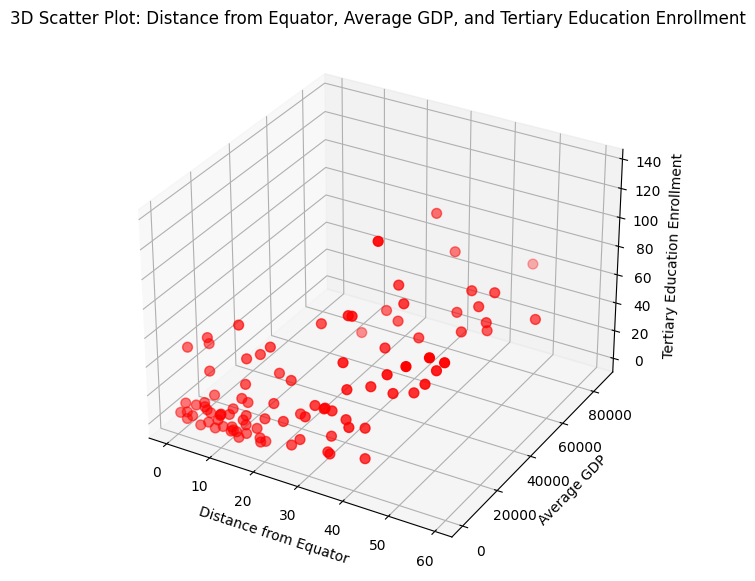

In [11]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gdp_equator_education_df['Distance from Equator'], gdp_equator_education_df['Average GDP'], gdp_equator_education_df['Tertiary Education'], c='r', marker='o', s=50)

ax.set_xlabel('Distance from Equator')
ax.set_ylabel('Average GDP')
ax.set_zlabel('Tertiary Education Enrollment')

# Save the graph as image
plt.savefig('3D Scatter Plot.png', dpi=300, bbox_inches='tight')

plt.title('3D Scatter Plot: Distance from Equator, Average GDP, and Tertiary Education Enrollment')
plt.show()

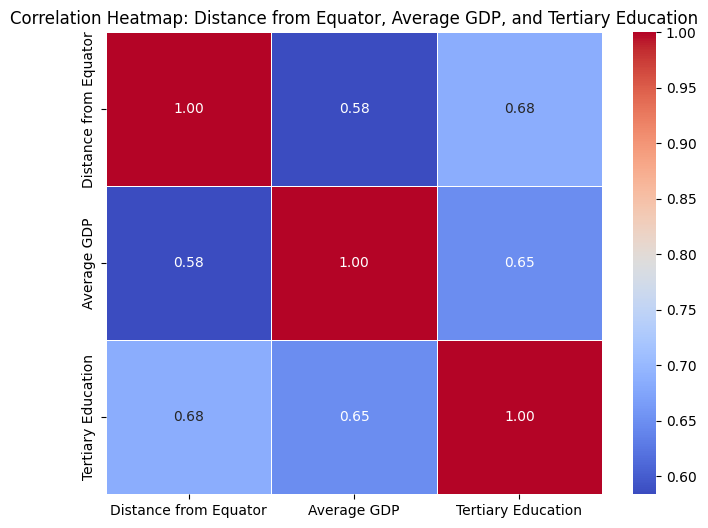

In [12]:
# Select only numeric columns from gdp_equator_education_df
numeric_columns = gdp_equator_education_df.select_dtypes(include=['number'])

# Filter only relevant columns for correlation (Distance from Equator, Average GDP, and Tertiary Education)
filtered_df = gdp_equator_education_df[['Distance from Equator', 'Average GDP', 'Tertiary Education']]

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap: Distance from Equator, Average GDP, and Tertiary Education')

# Save the graph as image
plt.savefig('Correlation Heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

# Conclusions and Insights

Throughout the analysis, we explored the relationships between **Distance from the Equator**, **Average GDP**, and **Tertiary Education Enrollment** using various statistical techniques and visualizations. Here are the key conclusions and insights:

1. **Multiple Linear Regression**:
   - The regression models show that **Distance from the Equator** is a statistically significant predictor for both **Average GDP** and **Tertiary Education Enrollment**.
   - Countries located farther from the equator tend to have higher **GDP** and **Tertiary Education Enrollment** rates, as indicated by the positive coefficients in the regression results.

2. **3D Scatter Plot**:
   - The 3D scatter plot visually illustrates the relationship between the three key variables. We observed that countries farther from the equator generally have higher GDP and education enrollment. This reinforces the insight from the regression model that geographic location influences economic and educational outcomes.

3. **Correlation Heatmap**:
   - The heatmap shows that **Distance from the Equator** has a moderate positive correlation with both **GDP** and **Tertiary Education Enrollment**.
   - The correlation between **GDP** and **Tertiary Education Enrollment** is also positive, suggesting that wealthier countries tend to have higher education enrollment rates.
   - These relationships are not only statistically significant but also reveal how geographic and socio-economic factors interact.

4. **Box Plots**:
   - By binning countries into categories based on their distance from the equator, the box plots highlight that countries farther from the equator have a wider distribution of GDP and education enrollment, but overall tend to perform better in both areas.
   
### Key Insights:
- **Geography Matters**: Countries farther from the equator tend to have higher GDP and better educational outcomes, supporting the hypothesis that geographic location plays a role in socio-economic development.
- **Wealth and Education are Linked**: The positive correlation between GDP and education enrollment suggests that economic prosperity is associated with better access to and participation in higher education.
- **Statistical Significance**: The results from the multiple regression models and the correlation heatmap provide strong evidence that geographic distance from the equator is an influential factor in both economic and educational outcomes.

Overall, this analysis provides a comprehensive look at how geographic and socio-economic variables are interrelated, offering insights into the broader global trends in education and wealth distribution.

[![GitHub](https://img.shields.io/badge/GitHub-Repository-blue)](https://github.com/JulioValderrama/Latitude-GDP-and-Education-A-Data-Relationship-Study.git)
